## Optimization Attempt # 1
    Remove "STATUS" column - presumed to not impact outcome.
    Create Bins for "ASK_AMT", given the wide range of Loan Ask Amounts
    Increase number of hidden layers to 4
    Increase neurons per layer to 100

## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import Callback, ModelCheckpoint


#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

2023-08-29 10:27:46.350636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# Drop Status Column
application_clean = application_df.copy()
application_clean.drop(columns=["EIN","NAME","STATUS"], axis=1, inplace=True)
application_clean.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_clean.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_values = application_clean["APPLICATION_TYPE"].value_counts()
application_values

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
#Compile values into dictionary
application_dict = application_values.to_dict()

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []

for key,value in application_dict.items():
  if value < 528:
    application_types_to_replace.append(key)

# Replace in dataframe
for app in application_types_to_replace:
    application_clean['APPLICATION_TYPE'] = application_clean['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_clean['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
class_values = application_clean["CLASSIFICATION"].value_counts()
class_values

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_values_limited = application_clean["CLASSIFICATION"].value_counts()[application_clean["CLASSIFICATION"].value_counts() >1]
class_values_limited

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert value counts to dict
class_dict = class_values.to_dict()

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []

for key,value in class_dict.items():
  if value < 287:
    classifications_to_replace.append(key)


# Replace in dataframe
for cls in classifications_to_replace:
    application_clean['CLASSIFICATION'] = application_clean['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_clean['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [12]:
# Create variable for ask amt
amt = application_clean["ASK_AMT"]

In [13]:
# Create bins/labels for binning
bins = [0, 5001, 10000, 20000, 50000, 100000, 250000, 500000, 1000000, 10000000, 90000000000]
labels = [" 5K ", " 5K-10K ", " 10K-20k", " 20k-50k ", " 50k-100k ", "100k-250k", "250k-500k", "500k-1M", "1M-10M", ">10M" ]

In [14]:
# Process bins to a new column
application_clean["ASK_BINS"] = pd.cut(amt, bins, labels=labels)

In [15]:
# Drop inital ask_amt column since
application_clean.drop(columns="ASK_AMT", axis=1, inplace=True)

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_clean, columns=["AFFILIATION", "USE_CASE", "ORGANIZATION",\
                                                                "SPECIAL_CONSIDERATIONS", "APPLICATION_TYPE",\
                                                                 "CLASSIFICATION", "INCOME_AMT", "ASK_BINS"])

application_dummies.head()

,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,...,ASK_BINS_ 5K,ASK_BINS_ 5K-10K,ASK_BINS_ 10K-20k,ASK_BINS_ 20k-50k,ASK_BINS_ 50k-100k,ASK_BINS_100k-250k,ASK_BINS_250k-500k,ASK_BINS_500k-1M,ASK_BINS_1M-10M,ASK_BINS_>10M
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_dummies["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_dummies.copy()
X.drop(columns="IS_SUCCESSFUL", axis=1, inplace=True)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Define the model - deep neural net
nn = tf.keras.models.Sequential()

# Define inputs and nerons per layer
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 100
hidden_nodes_layer4 = 100


# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5400      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 35,801
Trainable params: 35,801
Non-trainable params: 0
_________________________________________________________________


2023-08-29 10:27:58.633948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5694 - accuracy: 0.7187
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7283
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7309
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7338
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5453 - accuracy: 0.7352
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5424 - accuracy: 0.7362
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5414 - accuracy: 0.7360
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5404 - accuracy: 0.7369
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5392 - accuracy: 0.7367
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5373 - accura

804/804 [==============================] - 2s 2ms/step - loss: 0.5112 - accuracy: 0.7502
Epoch 82/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5109 - accuracy: 0.7507
Epoch 83/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5113 - accuracy: 0.7496
Epoch 84/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5116 - accuracy: 0.7493
Epoch 85/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5100 - accuracy: 0.7509
Epoch 86/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5108 - accuracy: 0.7511
Epoch 87/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5112 - accuracy: 0.7509
Epoch 88/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5099 - accuracy: 0.7503
Epoch 89/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5109 - accuracy: 0.7507
Epoch 90/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5111 - accuracy: 

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6713 - accuracy: 0.7276 - 610ms/epoch - 2ms/step
Loss: 0.6713473796844482, Accuracy: 0.727580189704895


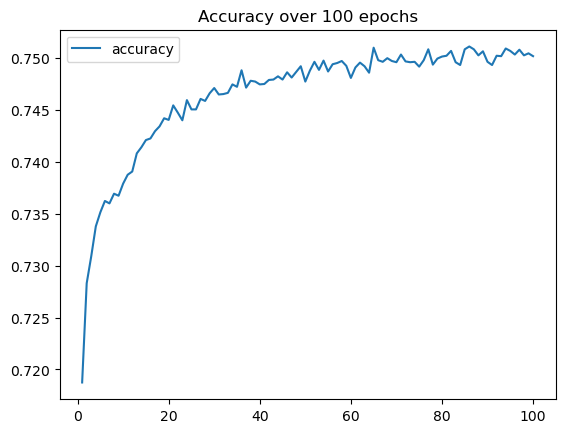

In [23]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="accuracy",title="Accuracy over 100 epochs")

plt.savefig('Plots/optimization_1_accuracy.png')
plt.show()

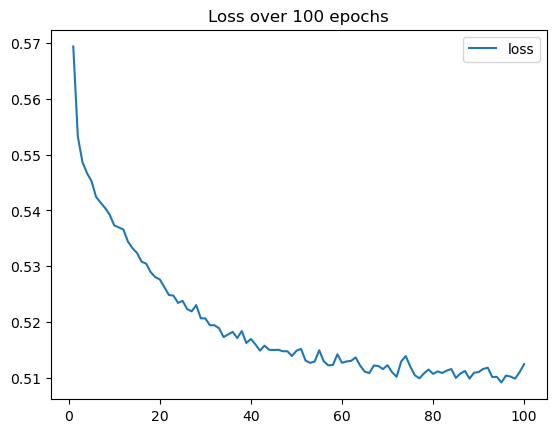

In [24]:
# Plot the loss
history_df.plot(y="loss", title="Loss over 100 epochs")

plt.savefig('Plots/optimization_1_loss.png')
plt.show()

In [25]:
# Export our model to HDF5 file
nn.save("H5_Files/AlphabetSoupCharity_Optimization_1.h5")